In [1]:
from quantileRegression import quantileRegression
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR",
         'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']

# ylist = ["SigmaIeIe"] 

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [4]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [5]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001 
stopEvtmc  = 3000000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13T

In [6]:
#print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles)

Loading corrected targets from :  correctedTargets.h5


In [7]:
dfmc = qr_mc.getDF()
#print dfmc

In [8]:
# now get the data
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  c

In [9]:
dfdata = qr_data.getDF()
#print dfdata

In [10]:
#poors man profile plot
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  SigmaRR
plotting  CovarianceIetaIphi
plotting  PhoIso03
plotting  ChIso03
plotting 

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 ChIso03worst


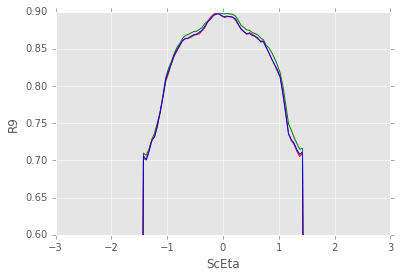

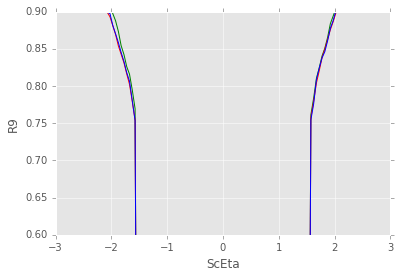

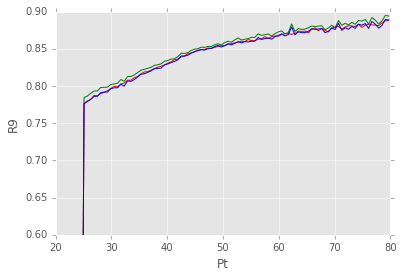

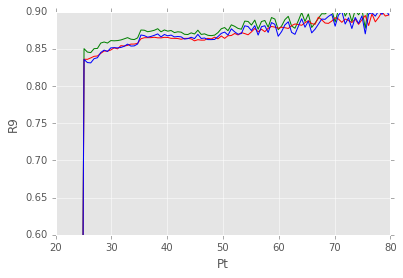

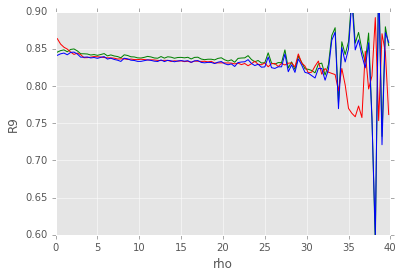

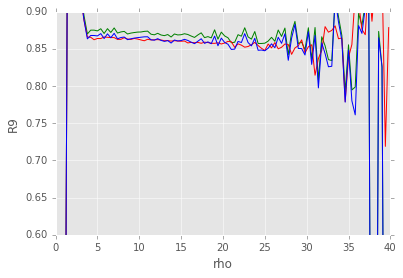

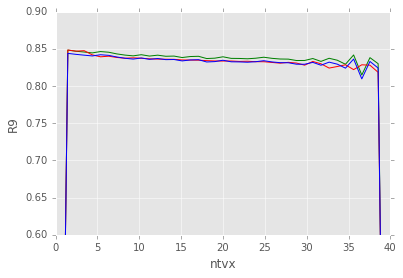

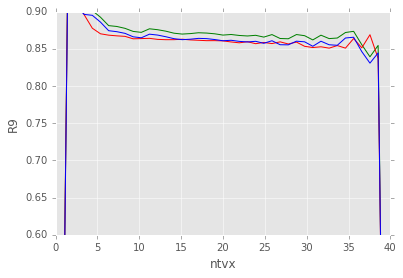

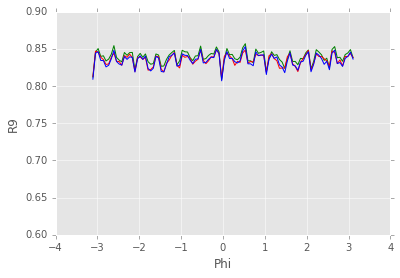

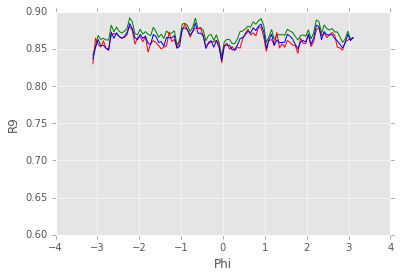

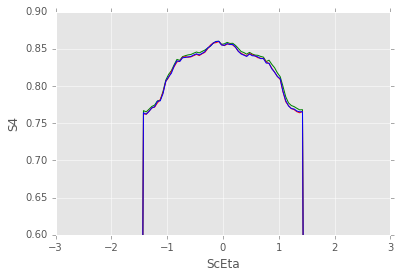

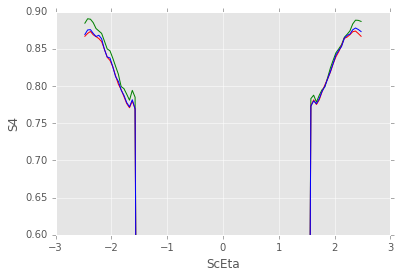

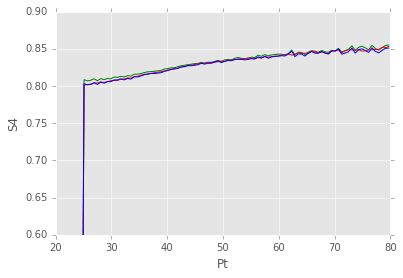

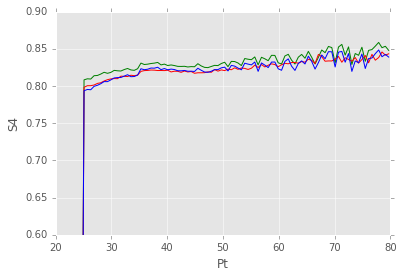

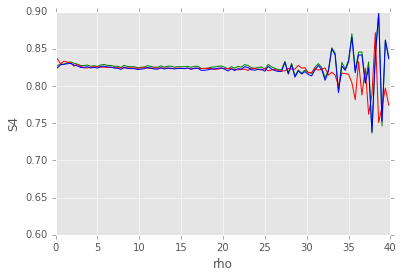

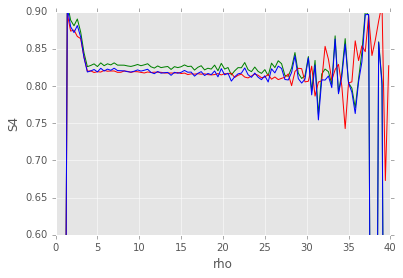

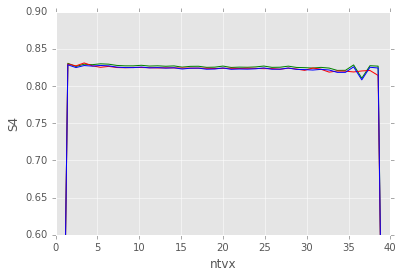

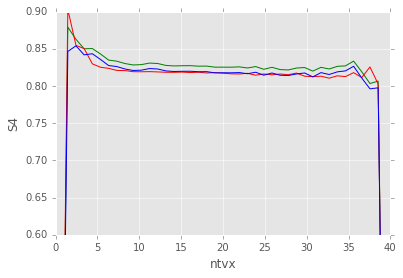

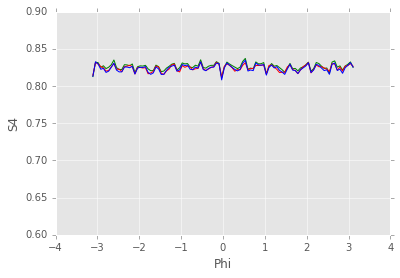

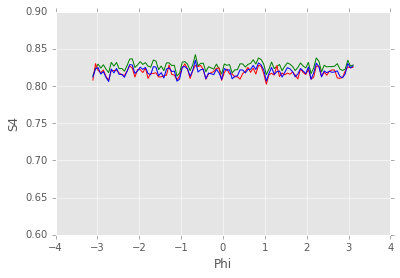

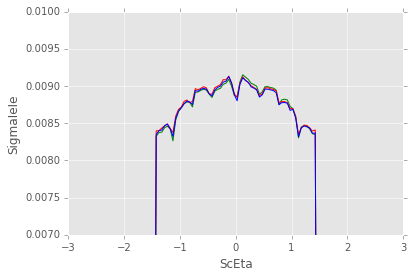

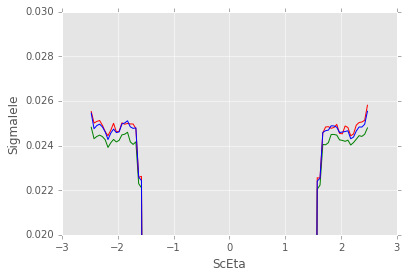

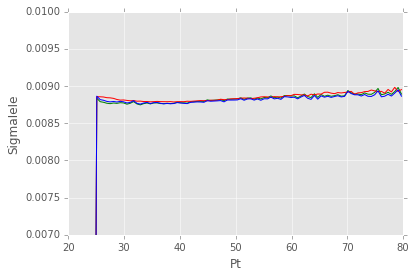

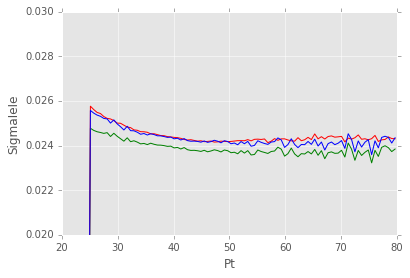

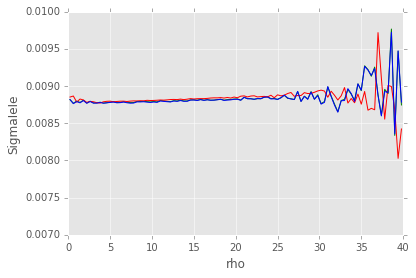

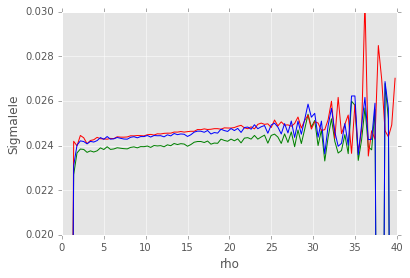

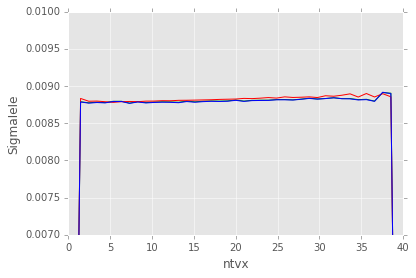

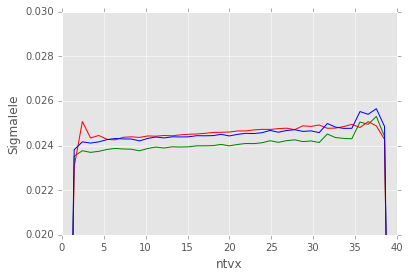

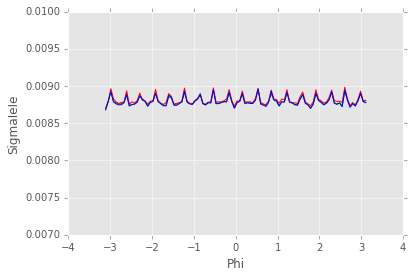

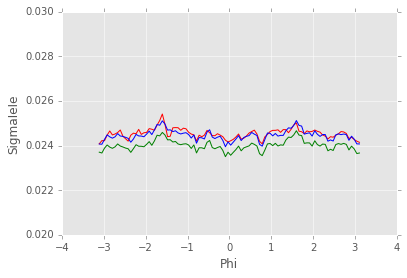

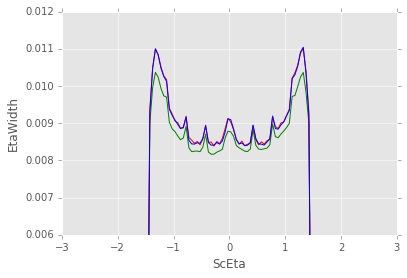

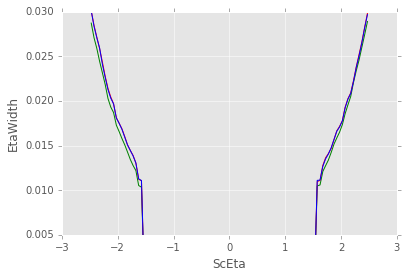

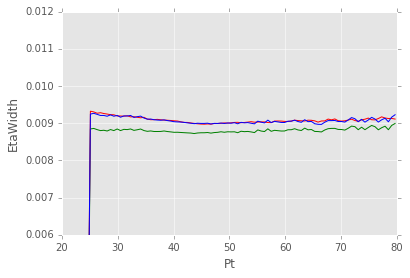

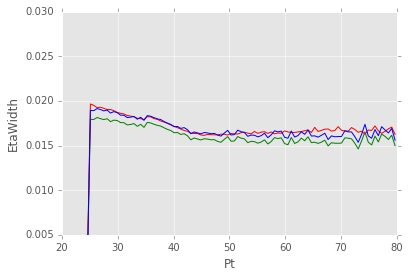

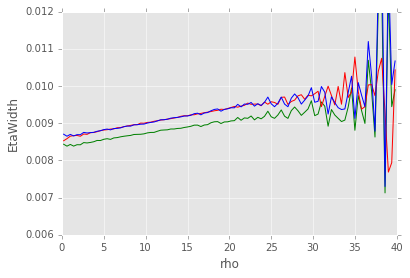

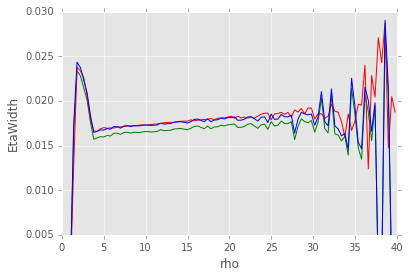

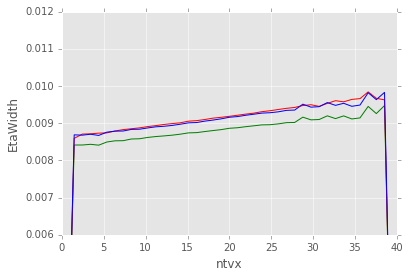

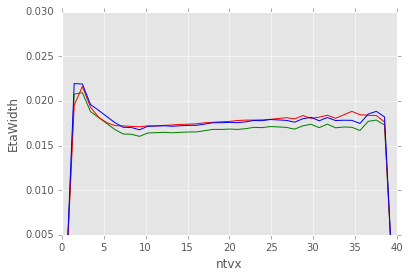

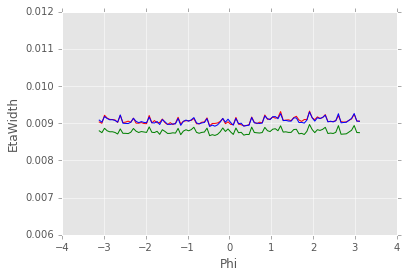

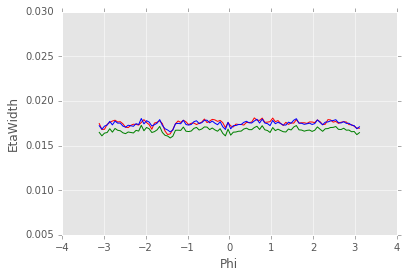

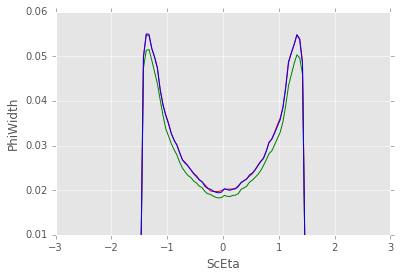

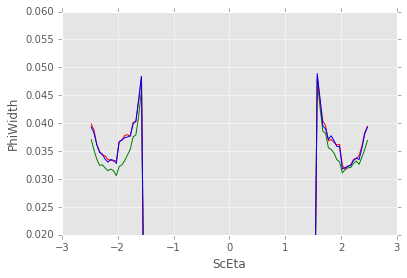

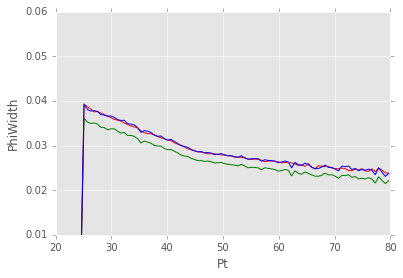

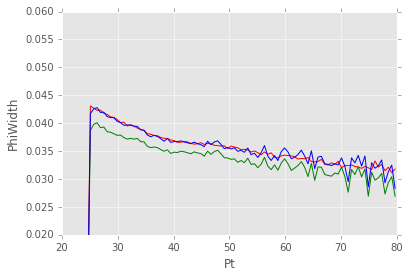

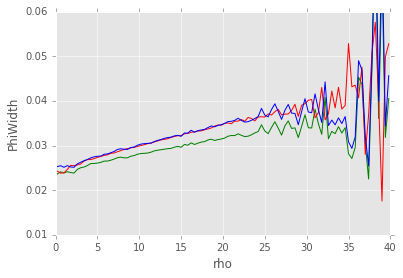

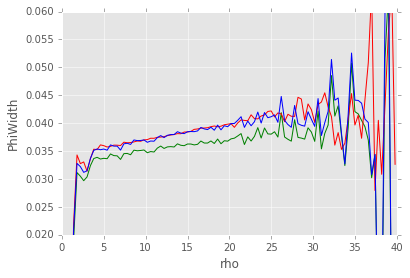

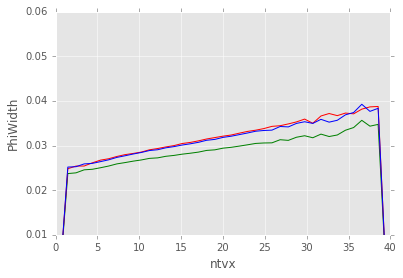

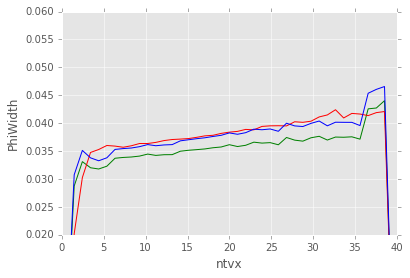

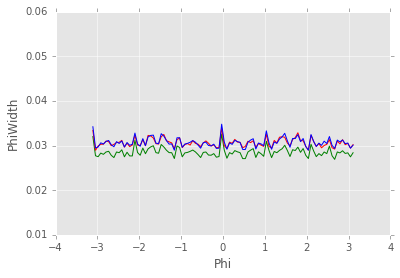

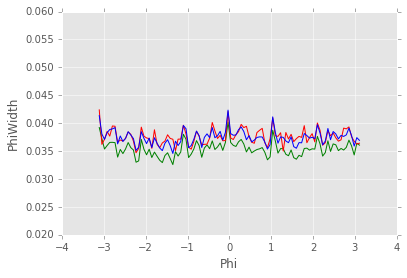

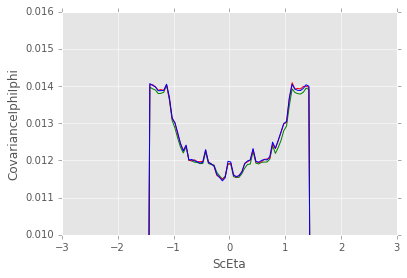

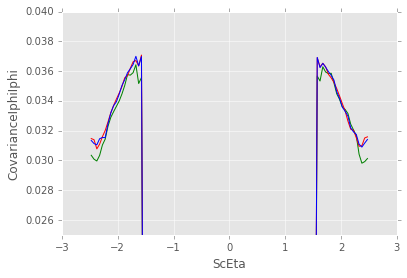

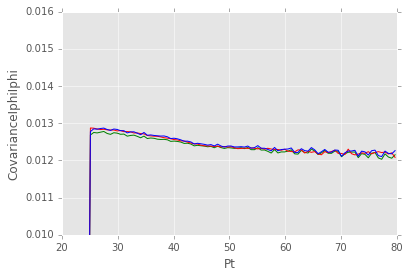

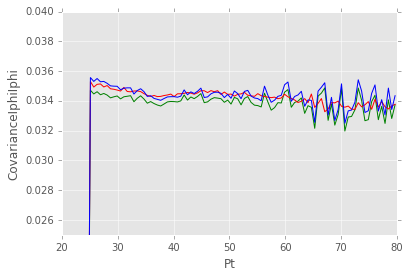

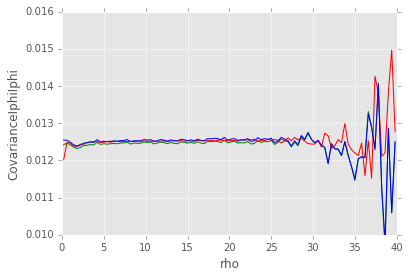

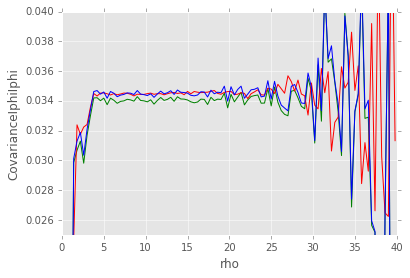

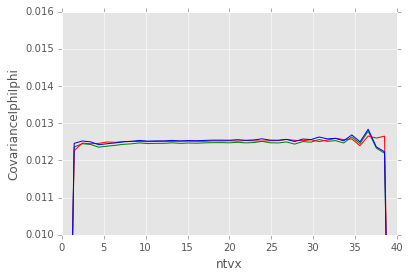

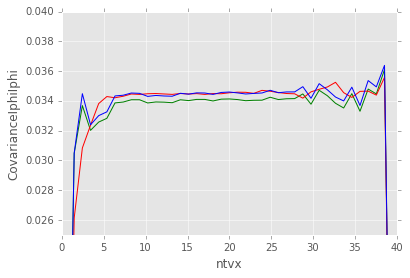

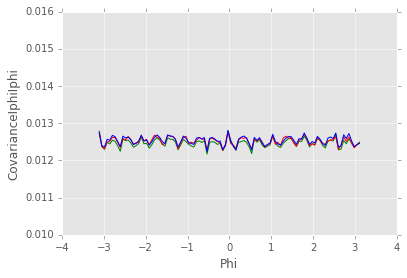

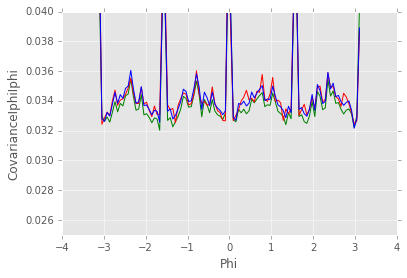

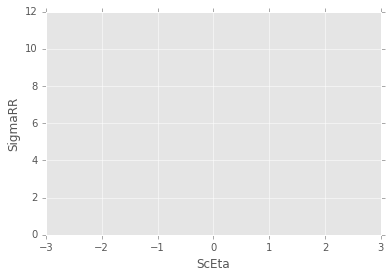

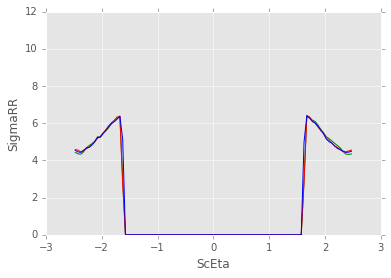

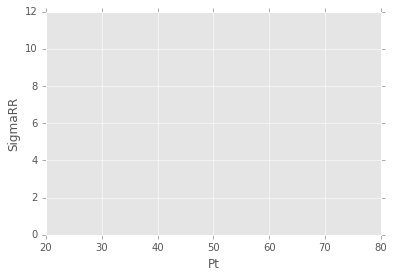

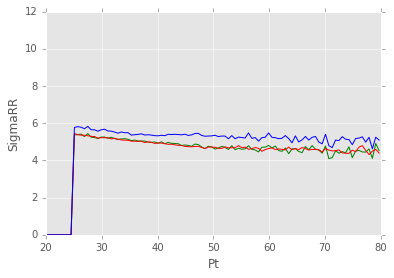

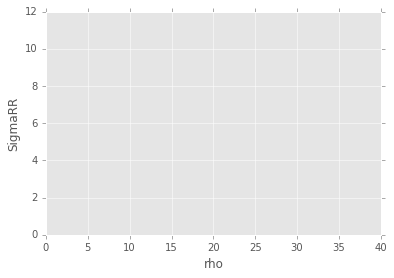

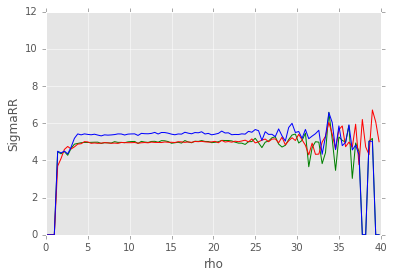

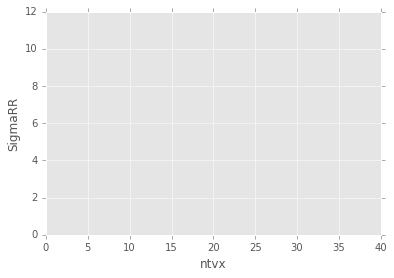

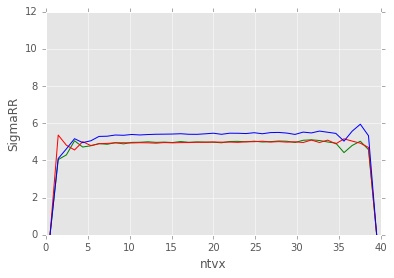

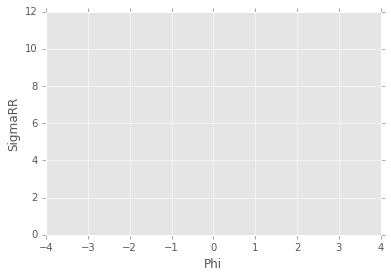

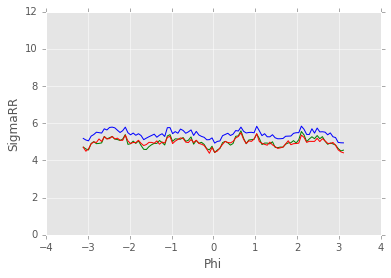

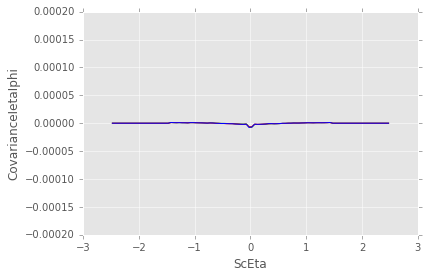

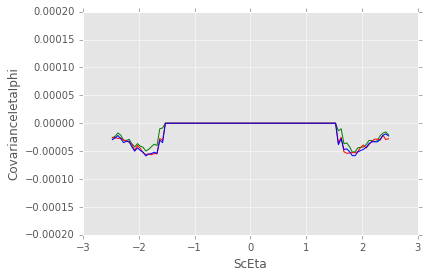

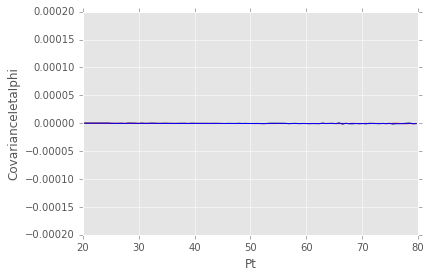

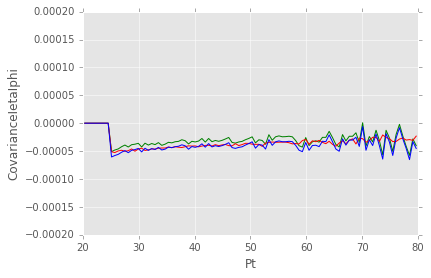

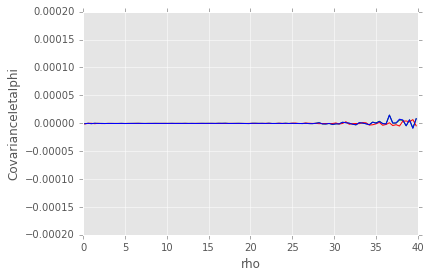

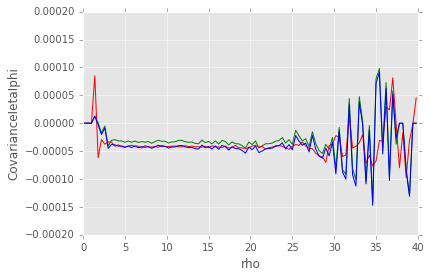

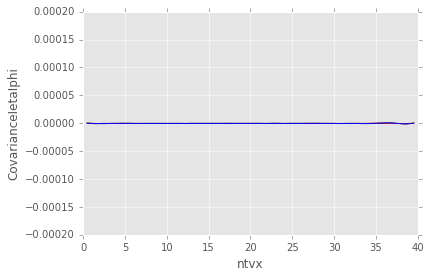

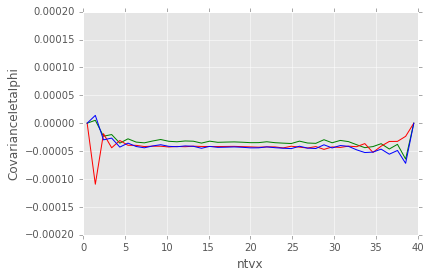

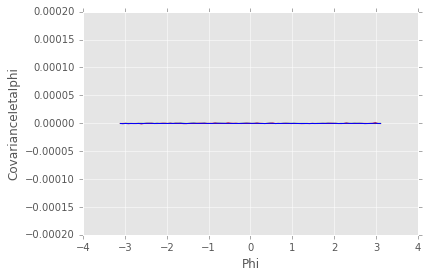

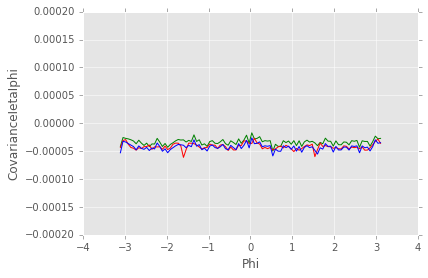

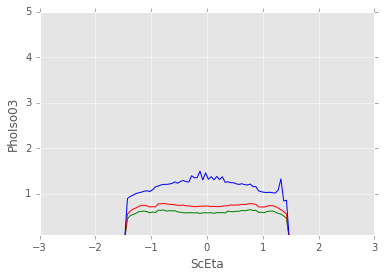

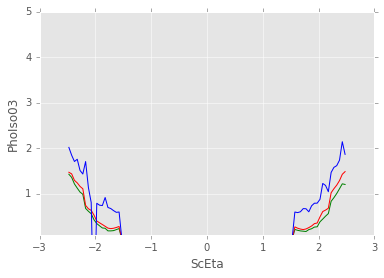

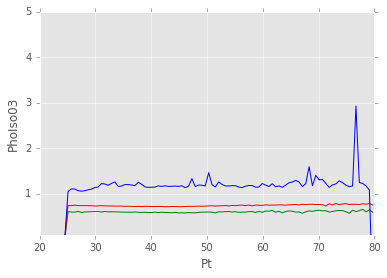

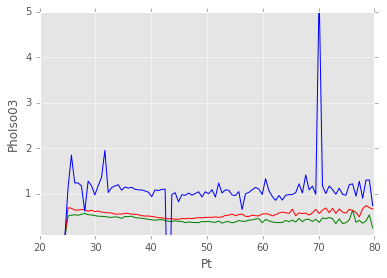

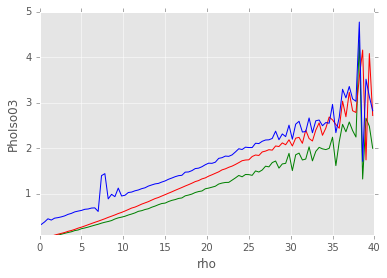

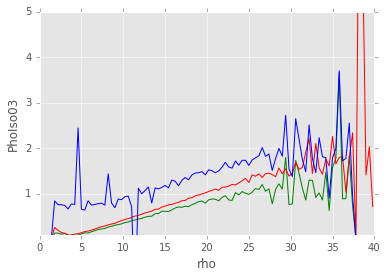

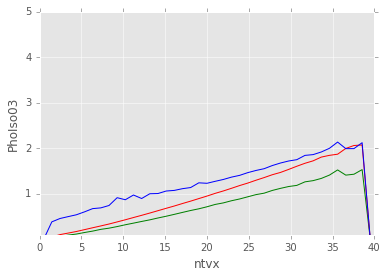

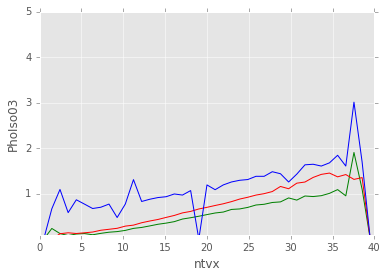

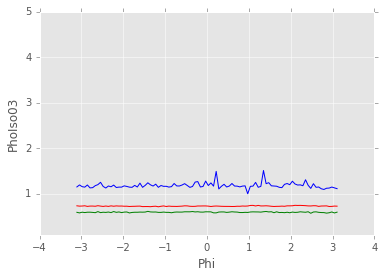

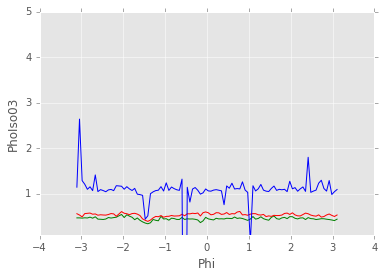

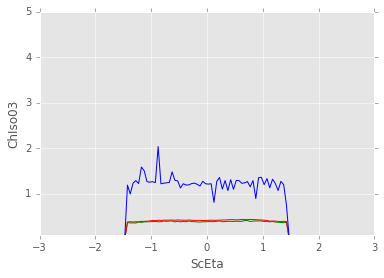

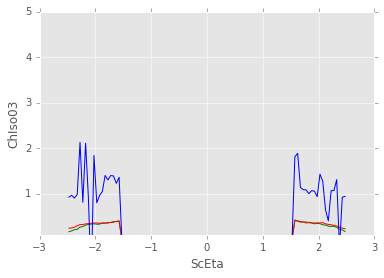

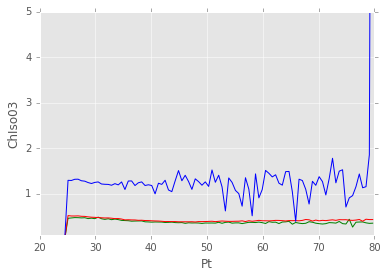

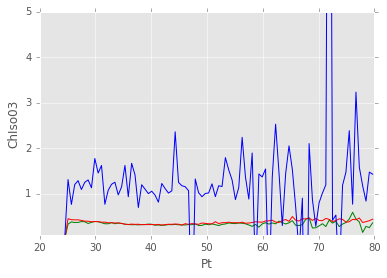

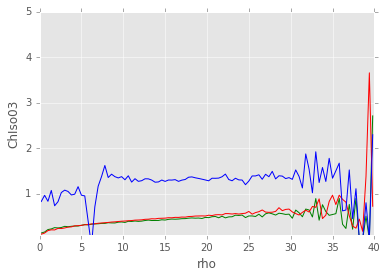

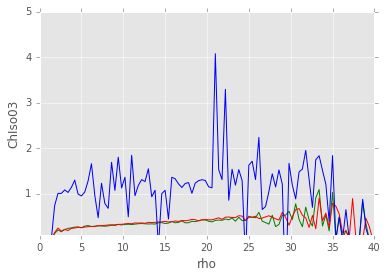

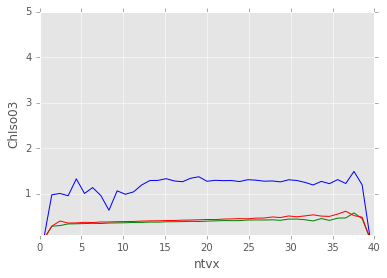

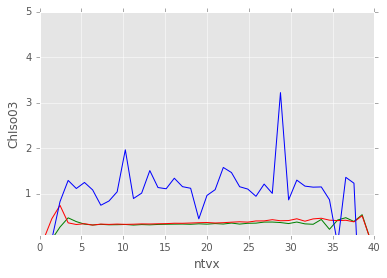

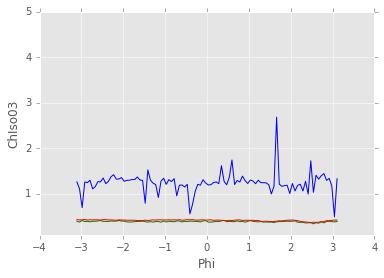

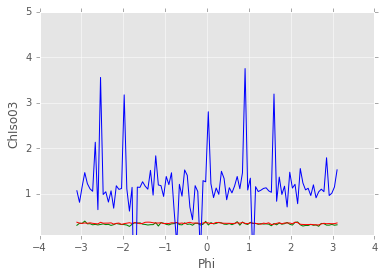

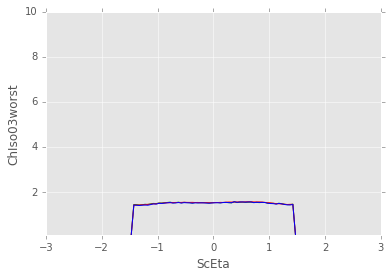

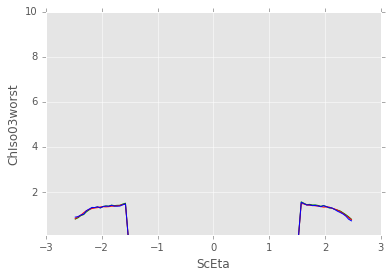

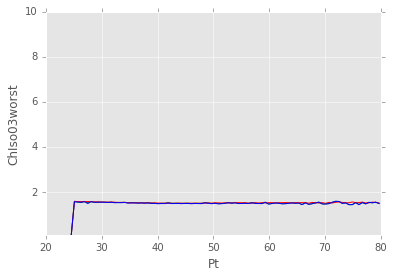

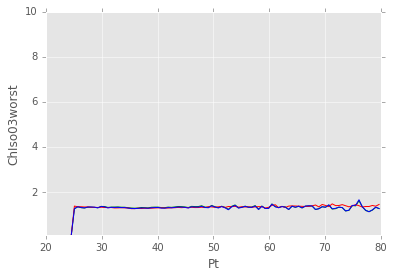

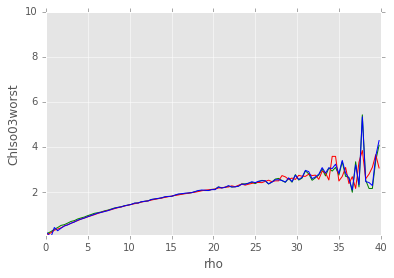

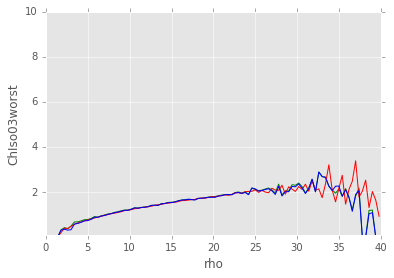

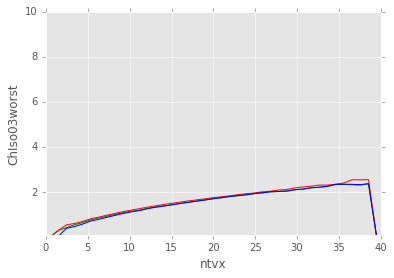

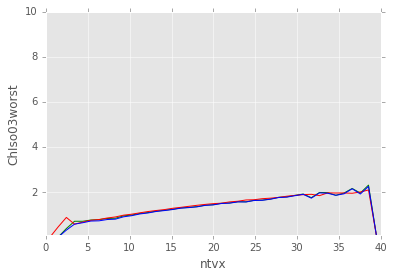

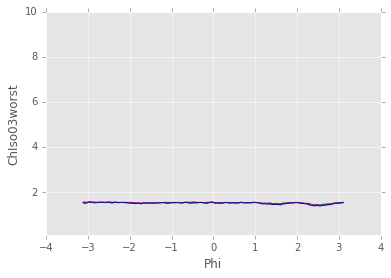

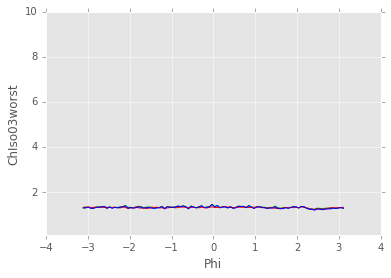

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfmcEB   = dfmc  .query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfmcEE   = dfmc  .query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.6, 0.9
        minEE, maxEE = 0.6, 0.9
    if yvar == "S4":
        minEB, maxEB = 0.6, 0.9
        minEE, maxEE = 0.6, 0.9
    if yvar == "SigmaIeIe":
        minEB, maxEB = 0.007, 0.010
        minEE, maxEE = 0.020, 0.030
    if yvar == "EtaWidth":
        minEB, maxEB = 0.006, 0.012
        minEE, maxEE = 0.005, 0.030
    if yvar == "PhiWidth":
        minEB, maxEB = 0.01, 0.06
        minEE, maxEE = 0.02, 0.06
    if yvar == "CovarianceIphiIphi":
        minEB, maxEB = 0.010, 0.016
        minEE, maxEE = 0.025, 0.040
    if yvar == "SigmaRR":
        minEB, maxEB = 0., 12.
        minEE, maxEE = 0., 12.
    if yvar == "CovarianceIetaIphi":
        minEB, maxEB = -0.0002, 0.0002
        minEE, maxEE = -0.0002, 0.0002
    if yvar == "PhoIso03":
        minEB, maxEB = 0.1, 5.0
        minEE, maxEE = 0.1, 5.0
    if yvar == "ChIso03":
        minEB, maxEB = 0.1, 5.0
        minEE, maxEE = 0.1, 5.0
    if yvar == "ChIso03worst":
        minEB, maxEB = 0.1, 10.0
        minEE, maxEE = 0.1, 10.0
    

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['ScEta']  , dfmcEB[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB['ScEta'], dfdataEB[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB['ScEta']  , dfmcEB[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['ScEta']  , dfmcEE[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE['ScEta'], dfdataEE[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE['ScEta']  , dfmcEE[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['Pt']  , dfmcEB[yvar]        ,100,20.,80.,ax, 'green')
    Profile(dfdataEB['Pt'], dfdataEB[yvar]      ,100,20.,80.,ax, 'red')
    Profile(dfmcEB['Pt']  , dfmcEB[yvar+'_corr'],100,20.,80.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['Pt']  , dfmcEE[yvar]        ,100,20.,80.,ax, 'green')
    Profile(dfdataEE['Pt'], dfdataEE[yvar]      ,100,20.,80.,ax, 'red')
    Profile(dfmcEE['Pt']  , dfmcEE[yvar+'_corr'],100,20.,80.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['rho']  , dfmcEB[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataEB['rho'], dfdataEB[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcEB['rho']  , dfmcEB[yvar+'_corr'],100,0.,40.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['rho']  , dfmcEE[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataEE['rho'], dfdataEE[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcEE['rho']  , dfmcEE[yvar+'_corr'],100,0.,40.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['nvtx']  , dfmcEB[yvar]        ,41,0.,40.,ax, 'green')
    Profile(dfdataEB['nvtx'], dfdataEB[yvar]      ,41,0.,40.,ax, 'red')
    Profile(dfmcEB['nvtx']  , dfmcEB[yvar+'_corr'],41,0.,40.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['nvtx']  , dfmcEE[yvar]        ,41,0.,40.,ax, 'green')
    Profile(dfdataEE['nvtx'], dfdataEE[yvar]      ,41,0.,40.,ax, 'red')
    Profile(dfmcEE['nvtx']  , dfmcEE[yvar+'_corr'],41,0.,40.,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    Profile(dfmcEB['Phi']  , dfmcEB[yvar]        ,100,-3.14,3.14,ax, 'green')
    Profile(dfdataEB['Phi'], dfdataEB[yvar]      ,100,-3.14,3.14,ax, 'red')
    Profile(dfmcEB['Phi']  , dfmcEB[yvar+'_corr'],100,-3.14,3.14,ax, 'blue')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    Profile(dfmcEE['Phi']  , dfmcEE[yvar]        ,100,-3.14,3.14,ax, 'green')
    Profile(dfdataEE['Phi'], dfdataEE[yvar]      ,100,-3.14,3.14,ax, 'red')
    Profile(dfmcEE['Phi']  , dfmcEE[yvar+'_corr'],100,-3.14,3.14,ax, 'blue')
